#**Sentence(N-Gram) Similarity Trial**

https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder

In [1]:
%%capture
!pip3 install seaborn

In [2]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:

word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344486355781555, 0.00048085825983434916, 0.06595248728990555, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.01652429811656475, 0.01573782227933407, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833269163966179, -0.0558621808886528, -0.012941432185471058, ...]



In [4]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

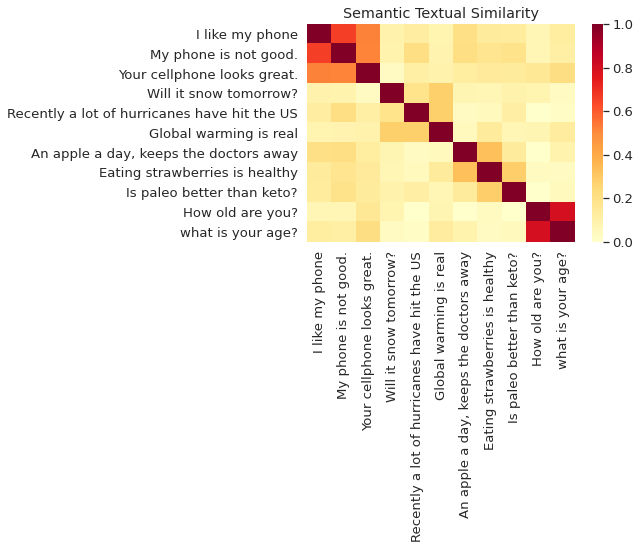

In [5]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)
               

#**NLTK Lexical Feature Extraction**

In [12]:
import pandas as pd
import numpy as np

Transcript_df = pd.read_csv("/content/drive/My Drive/EvueMe New Dataset/Top_130_Selected Top_120_Rejected Candidates/Transcript (Top_130_Selected Top_120_Rejected)/Transcript (Top_130_Selected Top_120_Rejected) in CSV format.csv")
Transcript_df

,Name,Text
0,Aaditya Dinesh Thokade,Delhi MP Thane District in Maharashtra state a...
1,Aakansha Das,Ok good afternoon. I am I am from Rudrapur Utt...
2,Aakash Bomb,Ajmer city of Rajasthan state Ajmer is located...
3,Aarthi S R,"hello, I am Aarti and most my life in school a..."
4,Aashita Varma,Android studio for the past 15 years and field...
...,...,...
245,visakha mundra,Gujarat have been staying in Surat for like no...
246,Yash Gupta,Actually I hail from Delhi and I was born in D...
247,Yash Jain,11 Noida and Noida 122 right now and I live in...
248,Yashashvi Rastogi,I am right now living in Lucknow but I am I fr...


In [13]:
#Note - "Pandas read_csv" routine intelligently converts input to python datatypes. However this means that in our case some values could be translated to a float. We can prevent this intelligent (?) behaviour by specifying which datatypes I expect for each column.

Transcript_df.Text = Transcript_df.Text.astype(str)   

In [14]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(Transcript_df.Text.apply(round1))
data_clean

,Text
0,delhi mp thane district in maharashtra state a...
1,ok good afternoon i am i am from rudrapur utta...
2,ajmer city of rajasthan state ajmer is located...
3,hello i am aarti and most my life in school as...
4,android studio for the past years and field m...
...,...
245,gujarat have been staying in surat for like no...
246,actually i hail from delhi and i was born in d...
247,noida and noida right now and i live in noid...
248,i am right now living in lucknow but i am i fr...


In [16]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [17]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(Transcript_df.Text.apply(round2))
data_clean

,Text
0,Delhi MP Thane District in Maharashtra state a...
1,Ok good afternoon. I am I am from Rudrapur Utt...
2,Ajmer city of Rajasthan state Ajmer is located...
3,"hello, I am Aarti and most my life in school a..."
4,Android studio for the past 15 years and field...
...,...
245,Gujarat have been staying in Surat for like no...
246,Actually I hail from Delhi and I was born in D...
247,11 Noida and Noida 122 right now and I live in...
248,I am right now living in Lucknow but I am I fr...


**NOTE:** This data cleaning aka text pre-processing step could go on for a while, but we are going to stop for now. After going through some analysis techniques, if you see that the results don't make sense or could be improved, you can come back and make more edits such as:



* Mark 'cheering' and 'cheer' as the same word (stemming / lemmatization)
* Combine 'thank you' into one term (bi-grams)
* And a lot more...




***Organizing The Data*** <br>
The output of this notebook will be clean, organized data in two standard text formats:  <br>


**Corpus** - a collection of text <br>
**Document-Term Matrix** - word counts in matrix format
Corpus

We already have a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [18]:
Transcript_df

,Name,Text
0,Aaditya Dinesh Thokade,Delhi MP Thane District in Maharashtra state a...
1,Aakansha Das,Ok good afternoon. I am I am from Rudrapur Utt...
2,Aakash Bomb,Ajmer city of Rajasthan state Ajmer is located...
3,Aarthi S R,"hello, I am Aarti and most my life in school a..."
4,Aashita Varma,Android studio for the past 15 years and field...
...,...,...
245,visakha mundra,Gujarat have been staying in Surat for like no...
246,Yash Gupta,Actually I hail from Delhi and I was born in D...
247,Yash Jain,11 Noida and Noida 122 right now and I live in...
248,Yashashvi Rastogi,I am right now living in Lucknow but I am I fr...


In [19]:
# Let's pickle it for later use
import pickle
Transcript_df.to_pickle("/content/pickle/corpus.pkl")  #create a pickle folder on Content

**Document-Term Matrix**  <br>

<br>

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.  <br>

<br>


In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [20]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')  
data_cv = cv.fit_transform(data_clean.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,00,000,10,100,1000,10th,11,111,11th,12,121,122,125,12th,13,14,15,16,17,171,18,1820,1857,18ve,19,1919,1920,1935,1950,1999,1st,20,2000,2004,2008,2009,2012,2013,2015,2018,...,workers,working,workplace,works,workshop,workshops,world,worship,worth,wouldinspector,write,writers,wrong,wwe,xavier,xx,yaar,yad,yamuna,yamunanagar,yash,yatra,yeah,year,years,yes,youableton,youas,young,younger,youngsters,yourdrdl,youth,youtube,yummy,zero,zirakpur,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Let's pickle it for later use
data_dtm.to_pickle("/content/pickle/dtm.pkl")

In [22]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('/content/pickle/data_clean.pkl')
pickle.dump(cv, open("/content/pickle/cv.pkl", "wb"))

**Exploratory Data Analysis**

***Introduction***  <br>


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first. <br>
<br>

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:  <br>
<br>

Most common words - find these and create word clouds
Size of vocabulary - look number of unique words and also how quickly someone speaks
Amount of profanity - most common terms

***Most Common Words***

In [23]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('/content/pickle/dtm.pkl')
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zirakpur,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Print the top 5 words said by each Interviewee
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(5)
    top_dict[c]= list(zip(top.index, top.values))

for data.Name, top_words in top_dict.items():
    print(data.Name)
    print(', '.join([word for word, count in top_words[0:5]]))
    print('---')

0
culture, people, celebrate, come, ki
---
1
places, like, place, uttarakhand, beautiful
---
2
city, ajmer, world, staying, people
---
3
people, coimbatore, populated, area, day
---
4
city, lot, going, adventure, people
---
5
ki, jaipur, city, gaurav, women
---
6
corporate, gurgaon, moles, road, attractions
---
7
stay, parts, liver, people, likely
---
8
mall, hit, area, bahu, jammu
---
9
nearby, district, palakkad, tissue, hangouts
---
10
city, attractions, places, rent, modern
---
11
working, noida, change, currently, open
---
12
chandigarh, zirakpur, like, places, street
---
13
people, lot, like, area, places
---
14
sector, people, hangout, 15, faridabad
---
15
club, visit, just, park, area
---
16
customer, make, thathospitalhow, population, zoom
---
17
born, people, hoshangabad, hill, port
---
18
tajmahal, seven, ki, wonders, destination
---
19
tourism, ka, different, just, vehicle
---
20
bangalore, like, city, things, famous
---
21
nature, city, living, really, attraction
---
22
li

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [25]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 5 words for each Interviewee
words = []
for Text in data.columns:
    top = [word for (word, count) in top_dict[Text]]
    for t in top:
        words.append(t)
        
words

['culture',
 'people',
 'celebrate',
 'come',
 'ki',
 'places',
 'like',
 'place',
 'uttarakhand',
 'beautiful',
 'city',
 'ajmer',
 'world',
 'staying',
 'people',
 'people',
 'coimbatore',
 'populated',
 'area',
 'day',
 'city',
 'lot',
 'going',
 'adventure',
 'people',
 'ki',
 'jaipur',
 'city',
 'gaurav',
 'women',
 'corporate',
 'gurgaon',
 'moles',
 'road',
 'attractions',
 'stay',
 'parts',
 'liver',
 'people',
 'likely',
 'mall',
 'hit',
 'area',
 'bahu',
 'jammu',
 'nearby',
 'district',
 'palakkad',
 'tissue',
 'hangouts',
 'city',
 'attractions',
 'places',
 'rent',
 'modern',
 'working',
 'noida',
 'change',
 'currently',
 'open',
 'chandigarh',
 'zirakpur',
 'like',
 'places',
 'street',
 'people',
 'lot',
 'like',
 'area',
 'places',
 'sector',
 'people',
 'hangout',
 '15',
 'faridabad',
 'club',
 'visit',
 'just',
 'park',
 'area',
 'customer',
 'make',
 'thathospitalhow',
 'population',
 'zoom',
 'born',
 'people',
 'hoshangabad',
 'hill',
 'port',
 'tajmahal',
 'seven

In [26]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('city', 83),
 ('like', 52),
 ('people', 51),
 ('places', 26),
 ('place', 26),
 ('area', 24),
 ('famous', 21),
 ('different', 18),
 ('lot', 13),
 ('temple', 13),
 ('hangout', 11),
 ('population', 11),
 ('zoom', 11),
 ('areas', 11),
 ('years', 11),
 ('mall', 10),
 ('company', 10),
 ('hang', 9),
 ('staying', 8),
 ('park', 8),
 ('think', 8),
 ('various', 8),
 ('visit', 7),
 ('attraction', 7),
 ('near', 7),
 ('market', 7),
 ('ki', 6),
 ('jaipur', 6),
 ('attractions', 6),
 ('known', 6),
 ('live', 6),
 ('hr', 6),
 ('20', 6),
 ('college', 6),
 ('popular', 6),
 ('mumbai', 6),
 ('delhi', 6),
 ('india', 6),
 ('beautiful', 5),
 ('road', 5),
 ('sector', 5),
 ('living', 5),
 ('know', 5),
 ('good', 5),
 ('town', 5),
 ('food', 5),
 ('gurgaon', 4),
 ('stay', 4),
 ('noida', 4),
 ('things', 4),
 ('really', 4),
 ('lake', 4),
 ('main', 4),
 ('middle', 4),
 ('class', 4),
 ('located', 4),
 ('flemingo', 4),
 ('populations', 4),
 ('10', 4),
 ('major', 4),
 ('love', 4),
 ('follow', 4),
 ('talk', 4),
 ('univer

In [27]:
# If more than half of the Interviewees have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['city',
 'like',
 'people',
 'places',
 'place',
 'area',
 'famous',
 'different',
 'lot',
 'temple',
 'hangout',
 'population',
 'zoom',
 'areas',
 'years',
 'mall',
 'company',
 'hang',
 'staying',
 'park',
 'think',
 'various',
 'visit',
 'attraction',
 'near',
 'market']

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('/content/pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("/content/pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("/content/pickle/dtm_stop.pkl")

**No need**

In [29]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]


NameList = list(Transcript_df.Name)

# Create subplots for each Interviewee
for index, Name in enumerate(data.columns):
    wc.generate(data_clean.Text[Name])
    
    plt.subplot(50, 5, index+1) #50 rows * 5 columns = 250 datapoints
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(NameList[index])
    
plt.show()

**Findings from above**

**Number of Words**

In [31]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zirakpur,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print(total_rows, total_cols)

3565 250


In [33]:
# Find the number of unique words that each interviewee uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []

for i in range(total_cols):
  count=0
  for j in range(total_rows):
    if data.iat[j,i]==1:
      count+=1
  unique_list.append(count)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(NameList, unique_list)), columns=['Name', 'Count_Unique_Words'])
data_unique_sort = data_words.sort_values(by='Count_Unique_Words')
data_unique_sort


,Name,Count_Unique_Words
217,Sumit Tiwari,1
231,THENMOZHI M,2
94,Kiruthiga N,2
211,Srishti Jain,3
137,Pournima Madan Gade,3
...,...,...
226,Tanya Anand,107
222,Tanay Kandoi,107
148,Preet Sagar Singh,113
151,Puja Ramesh Patekar,119


In [34]:
# Interview durationof each candidate in seconds
!pip install librosa
import librosa
import glob

Total_Duration=[]

for audio in glob.glob("/content/drive/My Drive/EvueMe New Dataset/Top_130_Selected Top_120_Rejected Candidates/Audio Files (Top_130_Selected Top_120_Rejected)/*.wav"):
    y , sr = librosa.load(audio, sr = 44100)
    Total_Duration.append(librosa.get_duration(y=y, sr=sr))

Total_Duration, len(Total_Duration)

([45.802675736961454,
  238.8480045351474,
  53.696009070294785,
  52.416009070294784,
  64.64,
  31.786666666666665,
  61.461337868480726,
  88.38401360544218,
  46.86934240362812,
  35.58401360544217,
  117.0773469387755,
  42.28267573696145,
  29.290680272108844,
  67.09333333333333,
  42.24,
  48.02133786848073,
  184.83201814058958,
  55.95734693877551,
  16.725351473922903,
  41.10934240362812,
  37.95201814058957,
  48.02133786848073,
  68.52267573696145,
  48.38401360544218,
  48.55467120181406,
  55.80800453514739,
  17.87734693877551,
  64.17068027210884,
  42.85868480725624,
  68.60800453514739,
  75.7973469387755,
  39.06133786848073,
  29.16267573696145,
  239.68,
  50.68800453514739,
  39.18934240362812,
  43.989342403628115,
  55.95734693877551,
  30.229342403628117,
  69.7173469387755,
  116.24535147392291,
  47.57333333333333,
  95.97868480725623,
  91.81868480725623,
  178.53868480725623,
  139.75467120181406,
  132.82133786848073,
  16.021337868480725,
  40.469342403

In [35]:
# Calculate the words per minute of each Interviewee

# Find the total number of words that an Interviewee uses
total_list = []
for i in data.columns:
    totals = sum(data[i])
    total_list.append(totals)

# Let's add some columns to our dataframe
data_words['Count_Total_Words'] = total_list
data_words['Type_Token_Ratio'] = 60 * (data_words['Count_Unique_Words'] / data_words['Count_Total_Words'])
data_words['Count_Total_Duration'] = Total_Duration
data_words['Words_Per_Minutes'] = 60 * (data_words['Count_Total_Words'] / data_words['Count_Total_Duration'])



data_words

# Sort the dataframe by words per minute to see who talks the slowest and fastest
#data_wpm_sort = data_words.sort_values(by='Words_Per_Minutes')
#data_wpm_sort

,Name,Count_Unique_Words,Count_Total_Words,Type_Token_Ratio,Count_Total_Duration,Words_Per_Minutes
0,Aaditya Dinesh Thokade,31,44,42.272727,45.802676,57.638554
1,Aakansha Das,22,38,34.736842,238.848005,9.545820
2,Aakash Bomb,44,65,40.615385,53.696009,72.631096
3,Aarthi S R,69,96,43.125000,52.416009,109.890091
4,Aashita Varma,57,95,36.000000,64.640000,88.180693
...,...,...,...,...,...,...
245,visakha mundra,48,72,40.000000,77.802676,55.525083
246,Yash Gupta,37,44,50.454545,181.098685,14.577687
247,Yash Jain,54,111,29.189189,101.120000,65.862342
248,Yashashvi Rastogi,38,53,43.018868,110.165351,28.865700


In [36]:
data_words.sort_values("Name", axis = 0, ascending = True, inplace = True) 

In [37]:
data_words

,Name,Count_Unique_Words,Count_Total_Words,Type_Token_Ratio,Count_Total_Duration,Words_Per_Minutes
37,ARUNPRAGASH M,18,20,54.000000,55.957347,21.444905
40,ATASHI PANDA,61,143,25.594406,116.245351,73.809403
0,Aaditya Dinesh Thokade,31,44,42.272727,45.802676,57.638554
1,Aakansha Das,22,38,34.736842,238.848005,9.545820
2,Aakash Bomb,44,65,40.615385,53.696009,72.631096
...,...,...,...,...,...,...
247,Yash Jain,54,111,29.189189,101.120000,65.862342
248,Yashashvi Rastogi,38,53,43.018868,110.165351,28.865700
249,Yojit Sapra,46,80,34.500000,100.117347,47.943739
77,harini,15,19,47.368421,46.314671,24.614231


In [39]:
data_words.to_csv("/content/drive/My Drive/EvueMe New Dataset/Top_130_Selected Top_120_Rejected Candidates/Transcript (Top_130_Selected Top_120_Rejected)/Lexical250.csv", index=False)

In [41]:
pd.read_csv("/content/drive/My Drive/EvueMe New Dataset/Top_130_Selected Top_120_Rejected Candidates/Transcript (Top_130_Selected Top_120_Rejected)/Lexical Features (NLTK+Grammar) Top_130_Selected Top_120_Rejected.csv")

,Name,Count_Unique_Words,Count_Total_Words,Type_Token_Ratio,Count_Total_Duration,Words_Per_Minutes,matches_grammar,WordErrorRate_grammar
0,ARUNPRAGASH M,18,20,54.000000,55.957347,21.444905,0,0.000000
1,ATASHI PANDA,61,143,25.594406,116.245351,73.809403,16,0.070470
2,Aaditya Dinesh Thokade,31,44,42.272727,45.802676,57.638554,2,0.027778
3,Aakansha Das,22,38,34.736842,238.848005,9.545820,1,0.022989
4,Aakash Bomb,44,65,40.615385,53.696009,72.631096,2,0.020690
...,...,...,...,...,...,...,...,...
245,Yash Jain,54,111,29.189189,101.120000,65.862342,8,0.037175
246,Yashashvi Rastogi,38,53,43.018868,110.165351,28.865700,3,0.022222
247,Yojit Sapra,46,80,34.500000,100.117347,47.943739,3,0.027624
248,harini,15,19,47.368421,46.314671,24.614231,4,0.083333
